<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201%20Pandas/team%2017/Assignment_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Management

The are tremendous batches of games throughout the internet. Anyone with a stable internet connection can download those games and enjoy the most recent collection of games in Google Playstore. We notice there are a record number of games from Google Playstore are free-to-play (FTP), while a selected few of them have prices on them. 

Therefore, for this assignment, we would like to apply the method of High Performance Data Processing (HPDP) to discover the meaning and the correlation between a free or paid games and the ratings given players.

## Downloading the Dataset


Let's begin by downloading the data, and listing the files within the dataset. First, download the applicable libraries such as Pandas and NumPy. Since our data will be imported from Google Drive, mount the drive to access it.

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extract the csv file from Google Drive. The file name is "Playstore.csv"

In [ ]:
# Google Playstore
file_google = "/content/drive/MyDrive/Colab Notebooks/Playstore.csv"
df = pd.read_csv(file_google)

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning






Load the dataset into a dataframe using Pandas.

In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


We want to know how many rows of data in the dataset.

In [ ]:
print("There are a total of",df.index.size,"number of records")

There are a total of 2312944 number of records


We want to know the number of columns of the dataset using the shape function.

In [ ]:
print("There are a total of",df.shape[1],"number of columns")

There are a total of 24 number of columns


Now, we want to know the names of the columns in the datset so we can choose which column to eliminate them later.

In [ ]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

Next, we need to drop the unneccesary column from the dataset which we will not entertain for the rest of the activity to reduce the size of dataset.

In [ ]:
df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'],axis=1)
df.head()


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


We want to know the number of columns remained after the elimination process

In [ ]:
print("There are a total of",df.shape[1],"number of columns")

There are a total of 16 number of columns


We want to know the number of "NULL" values present in the dataset and the location of that "NULL" value.

In [ ]:
print( "Number of rows having null values in the dataset:", len(df[df.isnull().any(axis=1)] ))
print()
print( "Where are the 'NULL' values located:")
print(df.isnull().any())

Number of rows having null values in the dataset: 71263

Where are the 'NULL' values located:
App Name             True
Category            False
Rating               True
Rating Count         True
Installs             True
Minimum Installs     True
Maximum Installs    False
Free                False
Price               False
Size                 True
Released             True
Last Updated        False
Content Rating      False
Ad Supported        False
In App Purchases    False
Editors Choice      False
dtype: bool


We want to drop all the "NULL" values from the dataset. However, we only wanted to drop "NULL" values of these column only; 1) Size, 2) Minimum Installs, 3) Installs, and 4) App Name

In [ ]:
df = df.dropna(subset=['Size','Minimum Installs','Installs','App Name'])

The dataset is now smaller in size and is easier to to the EDA process. Although the dataset is mere to completion for analysis, as we go into the datatype of each column, it presents a problem. The memory for each datatype allocations are to big.

In [ ]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290059e+06,2.290059e+06,2.312640e+06,2.312640e+06,2.312640e+06
mean,2.203151e+00,2.864841e+03,1.834604e+05,3.202396e+05,1.035117e-01
std,2.106223e+00,2.121627e+05,1.513208e+07,2.355650e+07,2.633299e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


First, we start witn the "Rating" column. We declare a new datatype for it to reduce it memory size. Thus, we begin fill in the "NULL" value with other meaning values.

In [ ]:
df['Rating']  = df['Rating'].astype(float)
avg = round(df['Rating'].mean(),1)
df['Rating'].fillna(avg,inplace=True)

We do the same thing for the "Rating Count" column.

In [ ]:
df['Rating Count']  = df['Rating Count'].astype(float)
avg = round(df['Rating Count'].mean(),1)
df['Rating Count'].fillna(avg,inplace=True)

We want to cealn our dataset by only including three values in the "Content Rating" column.

In [ ]:
df['Content Rating'] = df['Content Rating'].replace('Unrated',"Everyone")
df['Content Rating'] = df['Content Rating'].replace('Mature 17+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+',"Everyone")

Should this dataset (df) were to be corrupted, this variable (df1) is a backup dataset the original dataset.

In [ ]:
df1 = df
df1

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,77M,NaN,"Jun 01, 2021",Teen,False,False,False
2312940,ORU Online,Education,0.0,0.0,100+,100.0,430,True,0.0,44M,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
2312941,Data Structure,Education,0.0,0.0,100+,100.0,202,True,0.0,29M,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,10M,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False


As we go down into  "Installs" column have too many symbols. 

In [ ]:
df['Installs'].head(20)

0         10+
1      5,000+
2         50+
3         10+
4        100+
5         50+
6      1,000+
7        500+
8         10+
9     50,000+
10       100+
11       100+
12    10,000+
13       100+
14    10,000+
15     1,000+
16       500+
17        50+
18    10,000+
19         1+
Name: Installs, dtype: object

We need to clean it by replacing all symbols and convert the value into numeric.

In [ ]:
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace('Free','0')
df['Installs'] = pd.to_numeric(df['Installs'])

df['Installs'].head(20)

<ipython-input-57-d56bdb8964da>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


0        10
1      5000
2        50
3        10
4       100
5        50
6      1000
7       500
8        10
9     50000
10      100
11      100
12    10000
13      100
14    10000
15     1000
16      500
17       50
18    10000
19        1
Name: Installs, dtype: int64

We want to know the range of prices and establish a simpler way of viewing the prices.We add a new column named "Price Range".

In [ ]:
df['Price Range'] = pd.cut(df['Price'],bins=[0,0.19,9.99,29.99,410],labels=['Free','Cheap','Moderate','Expensive'],include_lowest=True)
df['Price Range'].value_counts()

Free         2267708
Cheap          41968
Moderate        2092
Expensive        872
Name: Price Range, dtype: int64

Last but not least, we want to know classify the rating counts for every games. Hence, we create another column named "Rating Type".

In [ ]:
df['Rating Type'] = 'NoRating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'Rating Type'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'Rating Type'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'Rating Type'] = 'More than 500K'
 
df['Rating Type'].value_counts()

Less than 10K           1215434
NoRating                1059762
Between 10K and 500K      35779
More than 500K             1665
Name: Rating Type, dtype: int64

## Exploratory Analysis and Visualization



Before we indulge further into the dataset, we would first need to lnow the basic statistical analysis from the dataset so we could indentify and redefine any data type.

In [ ]:
print("The median for Rating column is:",df['Rating'].median())
print("The mean for Rating column is:",round(df['Rating'].mean(), 2))
print("The mode for Rating column is:",df['Rating'].mode())

round(df.describe(),2)

The median for Rating column is: 2.8
The mean for Rating column is: 2.2
The mode for Rating column is: 0    0.0
dtype: float64


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price
count,2312640.0,2.312640e+06,2.312640e+06,2.312640e+06,2.312640e+06,2312640.00
mean,2.2,2.864840e+03,1.834604e+05,1.834604e+05,3.202396e+05,0.10
std,2.1,2.111243e+05,1.513208e+07,1.513208e+07,2.355650e+07,2.63
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
25%,0.0,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.00
50%,2.8,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.00
75%,4.3,4.500000e+01,5.000000e+03,5.000000e+03,7.354000e+03,0.00
max,5.0,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,400.00


Next, we are going to explore distributions of the "Rating" column by using a histogram. We could see that most games are being left unrayed by players.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f791dbe81f0>]],
      dtype=object)

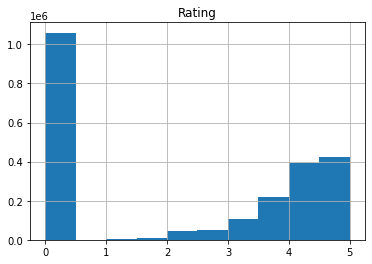

In [ ]:
df.hist(column='Rating')

Get the distribution of rating reviews of different categories

In [ ]:
df["Category"].value_counts()

Education                  241076
Music & Audio              154899
Tools                      143973
Business                   143761
Entertainment              138267
Lifestyle                  118324
Books & Reference          116726
Personalization             89209
Health & Fitness            83500
Productivity                79686
Shopping                    75250
Food & Drink                73919
Travel & Local              67281
Finance                     65454
Arcade                      53780
Puzzle                      51152
Casual                      50794
Communication               48159
Sports                      47474
Social                      44725
News & Magazines            42803
Photography                 35552
Medical                     32063
Action                      27541
Maps & Navigation           26722
Simulation                  23268
Adventure                   23193
Educational                 21302
Art & Design                18536
Auto & Vehicle

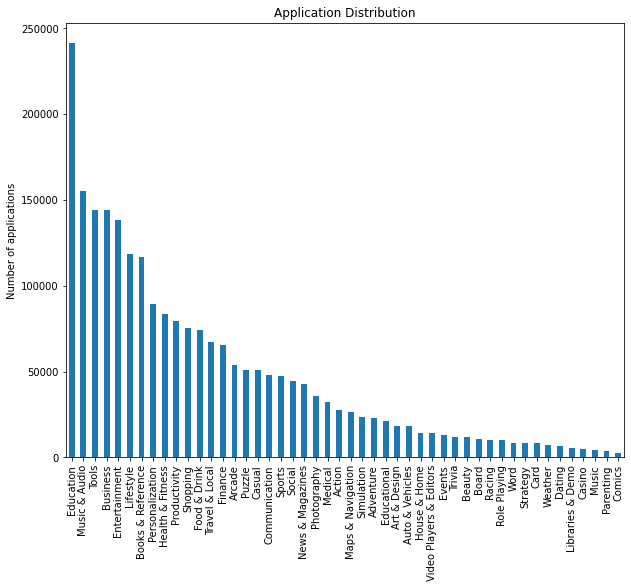

In [ ]:
df["Category"].value_counts().plot(kind='bar',
                                       figsize=(10, 8),
                                       ylabel="Number of applications",
                                       title="Application Distribution",
                                      );

Explore the rating distribution of all categories

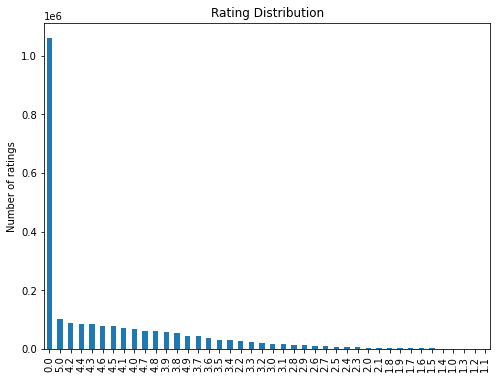

In [ ]:
df["Rating"].value_counts().plot(kind='bar',
                                     figsize=(8, 6),
                                     ylabel="Number of ratings",
                                    title="Rating Distribution");

In [ ]:
avgRating = df["Rating"].mean().round(2)
print(f"Average Rating: {avgRating}")

Average Rating: 2.2


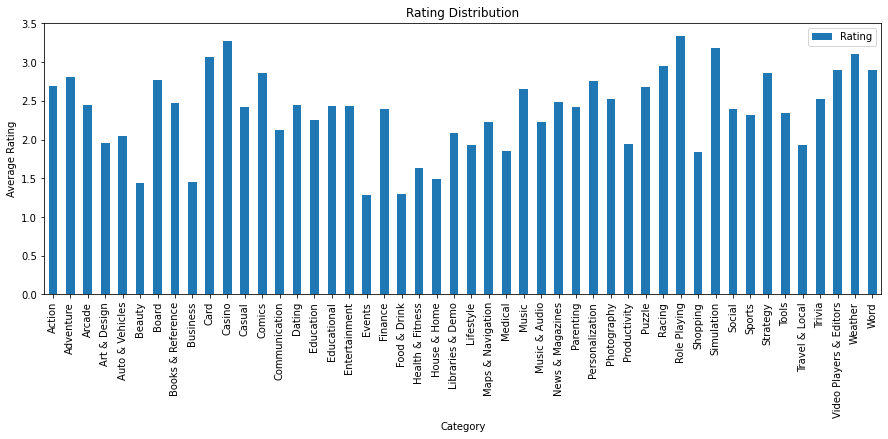

In [ ]:
df.pivot_table(index='Category', values='Rating', aggfunc='mean') \
    .plot(kind='bar', ylabel="Average Rating",
          title="Rating Distribution", figsize=(15, 5),
         );

## Asking and Answering Questions




#### Q1: How many categories are there 
> To answer this question, we must use the 'Unique' function to only indentify and calculate the unique name of category and discard any duplicate.

In [ ]:
df.Category.unique()
print("There are ", len(df.Category.unique()), "categories apps")

There are  48 categories apps


#### Q2: Which category has the least number of apps

>We would like to focus on the infamous game category among game developers. 

In [ ]:
categories_by_apps = df.Category.value_counts()
categories_by_apps[-10:]

Word                8627
Strategy            8517
Card                8176
Weather             7245
Dating              6523
Libraries & Demo    5196
Casino              5076
Music               4201
Parenting           3810
Comics              2862
Name: Category, dtype: int64

>We now visualize the data previously acquired using bar chart to understand the actual situation of each category labeled as 'Least Develop Game Category'. These are the number of apps that are currently available in Google Store which is quite a few.

<bound method _AxesBase.invert_yaxis of <matplotlib.axes._subplots.AxesSubplot object at 0x7f79212e4c40>>

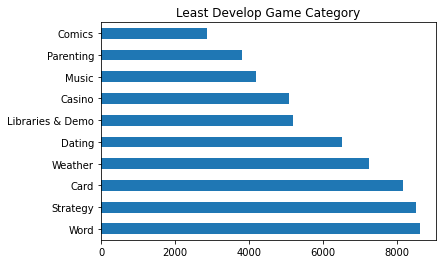

In [ ]:
categories_by_apps[-10:].plot(kind = 'barh', title = 'Least Develop Game Category').invert_yaxis

#### Q3: Which category has the most installs

>We would like to know the number of most installed apps by category.

In [ ]:
category_installs = df.groupby(['Category'])[['Maximum Installs']].sum().sort_values(by = 'Maximum Installs', ascending = False)
category_installs.head(10)

,Maximum Installs
Category,
Tools,119849243219
Communication,72306400652
Productivity,45368315275
Entertainment,32544846400
Social,32216874545
Photography,31590959146
Video Players & Editors,31439400657
Action,30741147359
Casual,30524713462


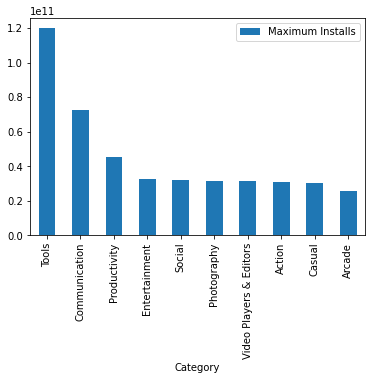

In [ ]:
category_installs.head(10).plot(kind = 'bar')

#### Q4: Does free apps have higher ratings than paid apps

>Does free games have a higher rating than the free games? We would like to find the correlation between these two variables. As the result below shows, the relationship is not significant.

In [ ]:
df_fp = df[['Rating', 'Free', 'Rating Count']]
df_fp = df_fp[df_fp['Rating Count'] > 99]
df_fp

,Rating,Free,Rating Count
9,4.7,True,820.0
12,3.9,True,118.0
14,3.7,True,1572.0
18,3.7,True,328.0
22,4.4,True,211.0
...,...,...,...
2312913,2.0,True,1687.0
2312931,2.8,True,1002.0
2312932,4.3,True,103466.0
2312933,4.0,True,344.0


In [ ]:
p_mean = df_fp.loc[df_fp['Free'] == False, 'Rating'].mean()
print("Paid apps mean:", p_mean)
f_mean = df_fp.loc[df_fp['Free'] == True, 'Rating'].mean()
print("Free apps mean:", f_mean)

Paid apps mean: 4.137505267593763
Free apps mean: 3.9252074398207184


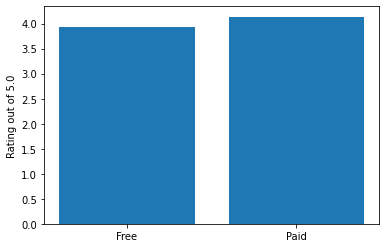

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Free', 'Paid'], [f_mean, p_mean])
plt.ylabel('Rating out of 5.0')
plt.show()

#### Q5: Does ad supported app have a higher rating compared to non-ad supported apps

In [ ]:
df_ans = df[['Rating', 'Rating Count', 'Ad Supported']]
df_ans = df_ans[df_ans['Rating Count'] > 99]
df_ans

,Rating,Rating Count,Ad Supported
9,4.7,820.0,True
12,3.9,118.0,True
14,3.7,1572.0,False
18,3.7,328.0,False
22,4.4,211.0,True
...,...,...,...
2312913,2.0,1687.0,False
2312931,2.8,1002.0,True
2312932,4.3,103466.0,True
2312933,4.0,344.0,False


In [ ]:
as_mean = df_ans.loc[df_ans['Ad Supported'] == True, 'Rating'].mean()
print("Mean for ad supported apps: ", as_mean)
nas_mean = df_ans.loc[df_ans['Ad Supported'] == False, 'Rating'].mean()
print("Mean for non-ad supported apps: ", nas_mean)

Mean for ad supported apps:  4.041396874127826
Mean for non-ad supported apps:  3.7293839238498148


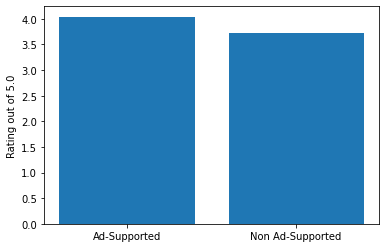

In [ ]:
plt.bar(['Ad-Supported', 'Non Ad-Supported'], [as_mean, nas_mean])
plt.ylabel('Rating out of 5.0')
plt.show()

## Inferences and Conclusion

>We found that the correlation between paid and free version a any games do exist but the proof is not sound enough to give a definite conclusion as what players rated the games.

## References and Future Work

